## SOM Clustering - CB4_64_16D_STK_v1

This document presents an example of spectral clustering in the CBERS4 collection (CB4_64_16D_STK_v1) of the BDC.

> This simple example aims to present how to clustering the data from the BDC stored inside the ODC. To know all the possible products, use [BDC-STAC](http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/).

In [1]:
import datacube
import numpy as np
import matplotlib.pyplot as plt
dc = datacube.Datacube(app='datacube')

In [2]:
PRODUCT_NAME = "CB4_64_16D_STK_v1"

**Load CB4_64_16D_STK_v1 product**

Initially, an entire scene will be loaded, in a range of specific dates

In [3]:
cb4_64_16d_ftile = dc.load(PRODUCT_NAME, measurements = ['red', 'green', 'blue', 'nir'], 
                                            time = ("2019-08"), resolution = (64, -64), limit = 2)
cb4_64_16d_ftile

<xarray.Dataset>
Dimensions:      (time: 2, x: 10504, y: 6866)
Coordinates:
  * time         (time) datetime64[ns] 2019-08-13 2019-08-29
  * y            (y) float64 9.657e+06 9.657e+06 9.657e+06 ... 1.01e+07 1.01e+07
  * x            (x) float64 4.963e+06 4.963e+06 4.962e+06 ... 4.29e+06 4.29e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 1165 1147 1150 1175 1206 ... 565 580 578 568
    green        (time, y, x) int16 917 912 918 949 984 ... 890 854 878 896 886
    blue         (time, y, x) int16 555 547 559 568 561 ... 826 834 842 825 826
    nir          (time, y, x) int16 2532 2482 2474 2612 ... 3635 3818 3810 3765
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

The example will use only a portion of the data that was uploaded. If necessary, in your analysis you can use the whole scene that was uploaded.

In [4]:
cb4_64_16d_stile = cb4_64_16d_ftile.isel(x = slice(0, 2000), y = slice(0, 2000))
cb4_64_16d_stile

<xarray.Dataset>
Dimensions:      (time: 2, x: 2000, y: 2000)
Coordinates:
  * time         (time) datetime64[ns] 2019-08-13 2019-08-29
  * y            (y) float64 9.657e+06 9.657e+06 ... 9.785e+06 9.785e+06
  * x            (x) float64 4.963e+06 4.963e+06 ... 4.835e+06 4.835e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 1165 1147 1150 1175 ... 1503 1554 1599 1558
    green        (time, y, x) int16 917 912 918 949 984 ... 1455 1422 1466 1467
    blue         (time, y, x) int16 555 547 559 568 561 ... 1300 1322 1345 1333
    nir          (time, y, x) int16 2532 2482 2474 2612 ... 3154 3189 3185 3134
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

Viewing the selected region

In [5]:
from utils.data_cube_utilities.dc_rgb import rgb

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f097fd1fef0>)

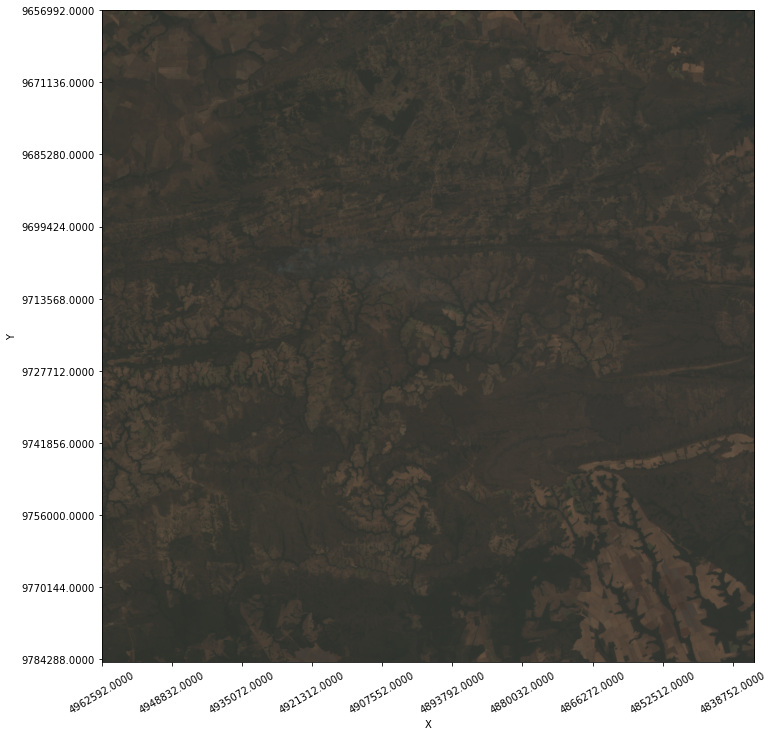

In [6]:
rgb(cb4_64_16d_stile, figsize = (12, 12), x_coord = 'x', y_coord = 'y')

## Clustering with SOM

In this section, the clustering using SOM is performed

In [7]:
import SimpSOM as sps
from utils.data_cube_utilities.dc_clustering import clustering_pre_processing

Below is the definition of the bands and the preparation of the data for clustering

In [8]:
bands = ['red', 'green', 'nir']

In [9]:
cb4_64_16d_stilec = cb4_64_16d_stile.copy()
cb4_64_16d_stilec_rgb = cb4_64_16d_stilec[bands]

cb4_64_16d_stilec_rgb = cb4_64_16d_stilec_rgb.sel(time = '2019-08-13')

In [10]:
features = clustering_pre_processing(cb4_64_16d_stilec_rgb, bands)

In [11]:
net = sps.somNet(20, 20, features, PBC = True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


Training!

In [14]:
net.train(0.01, 500)

Training SOM... done!


Visualizing the results

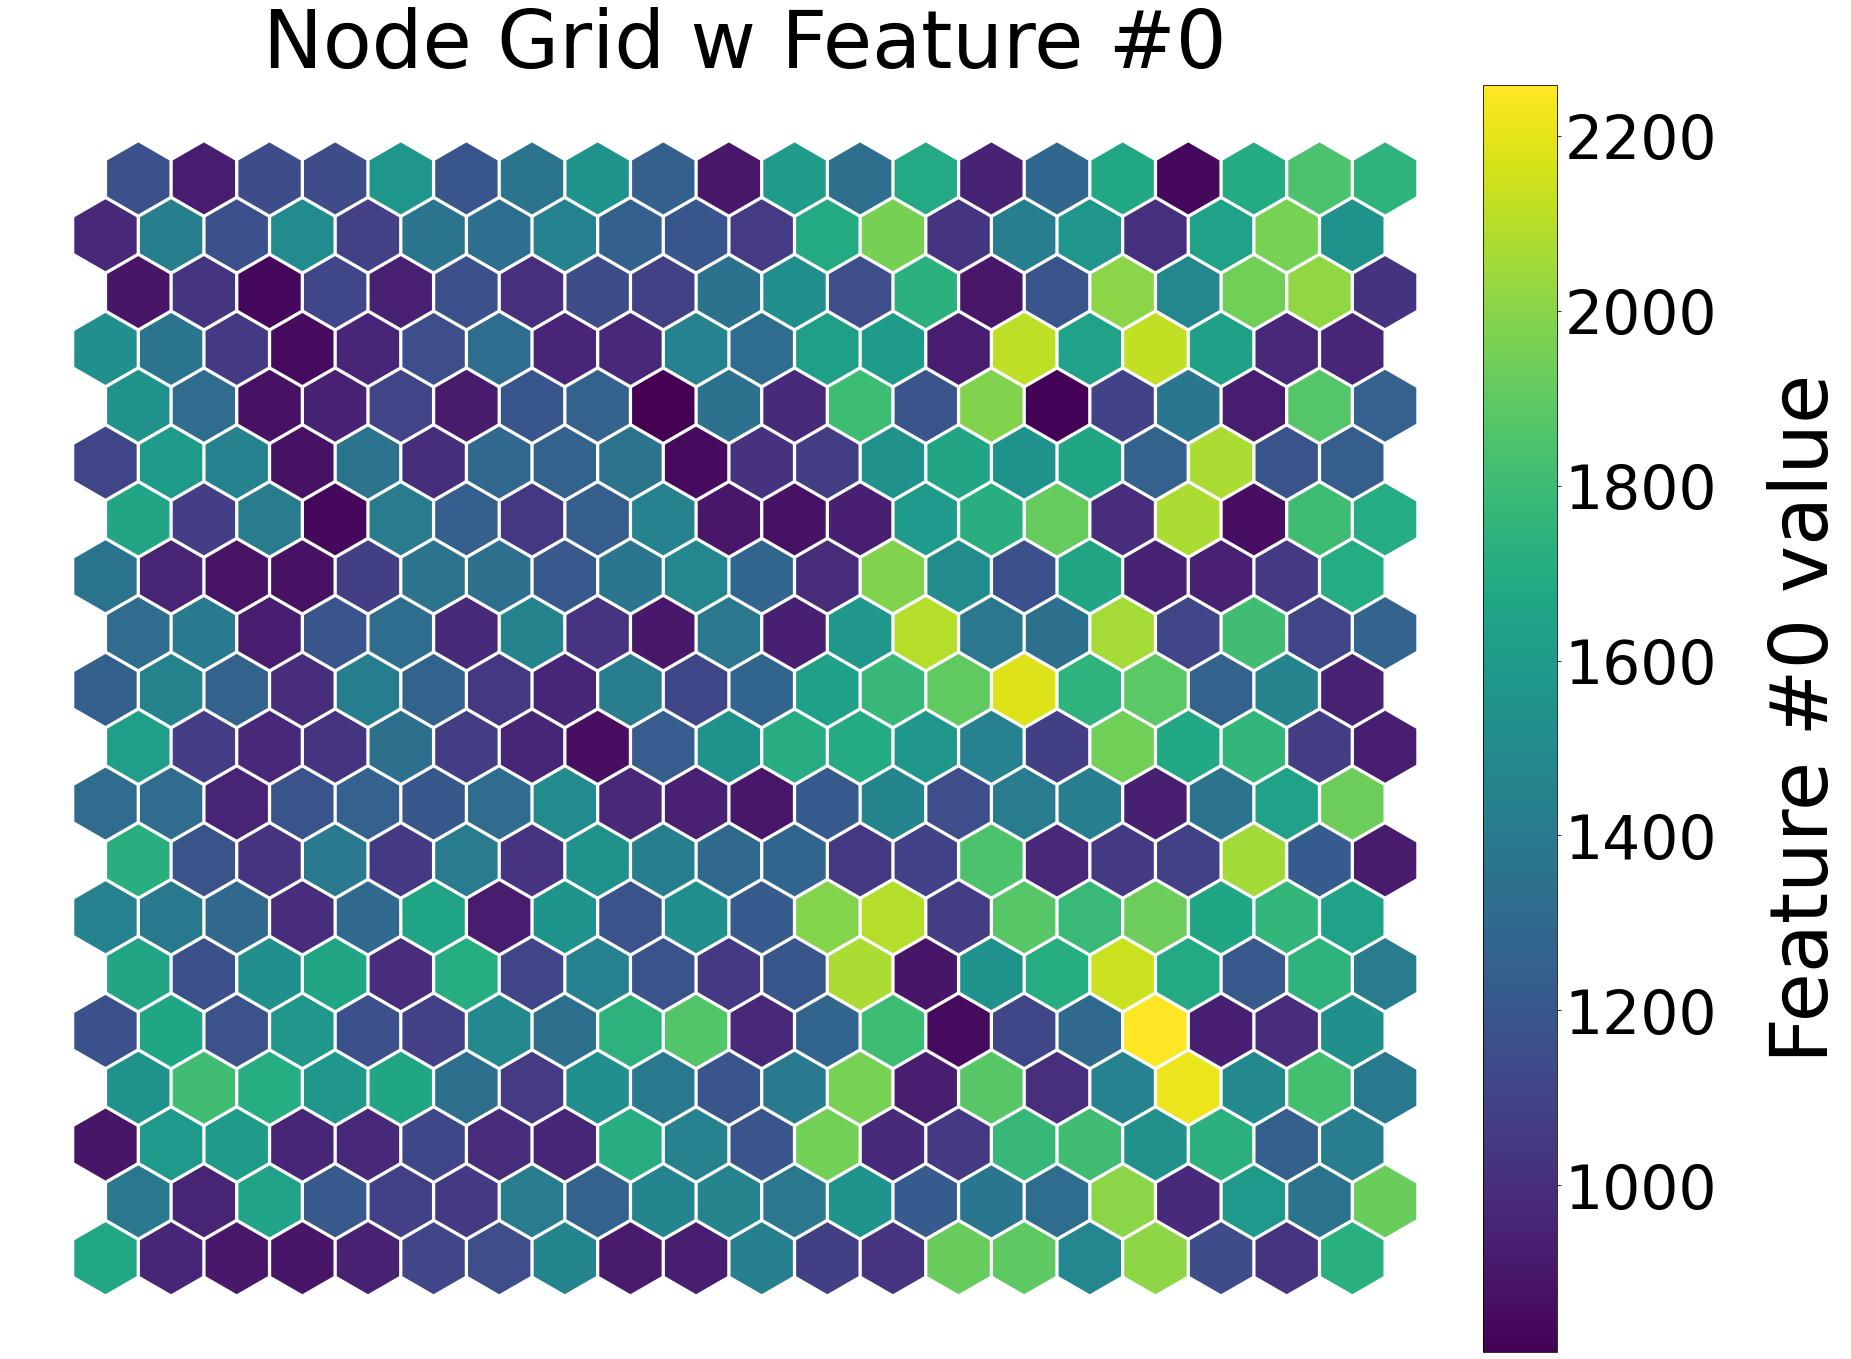

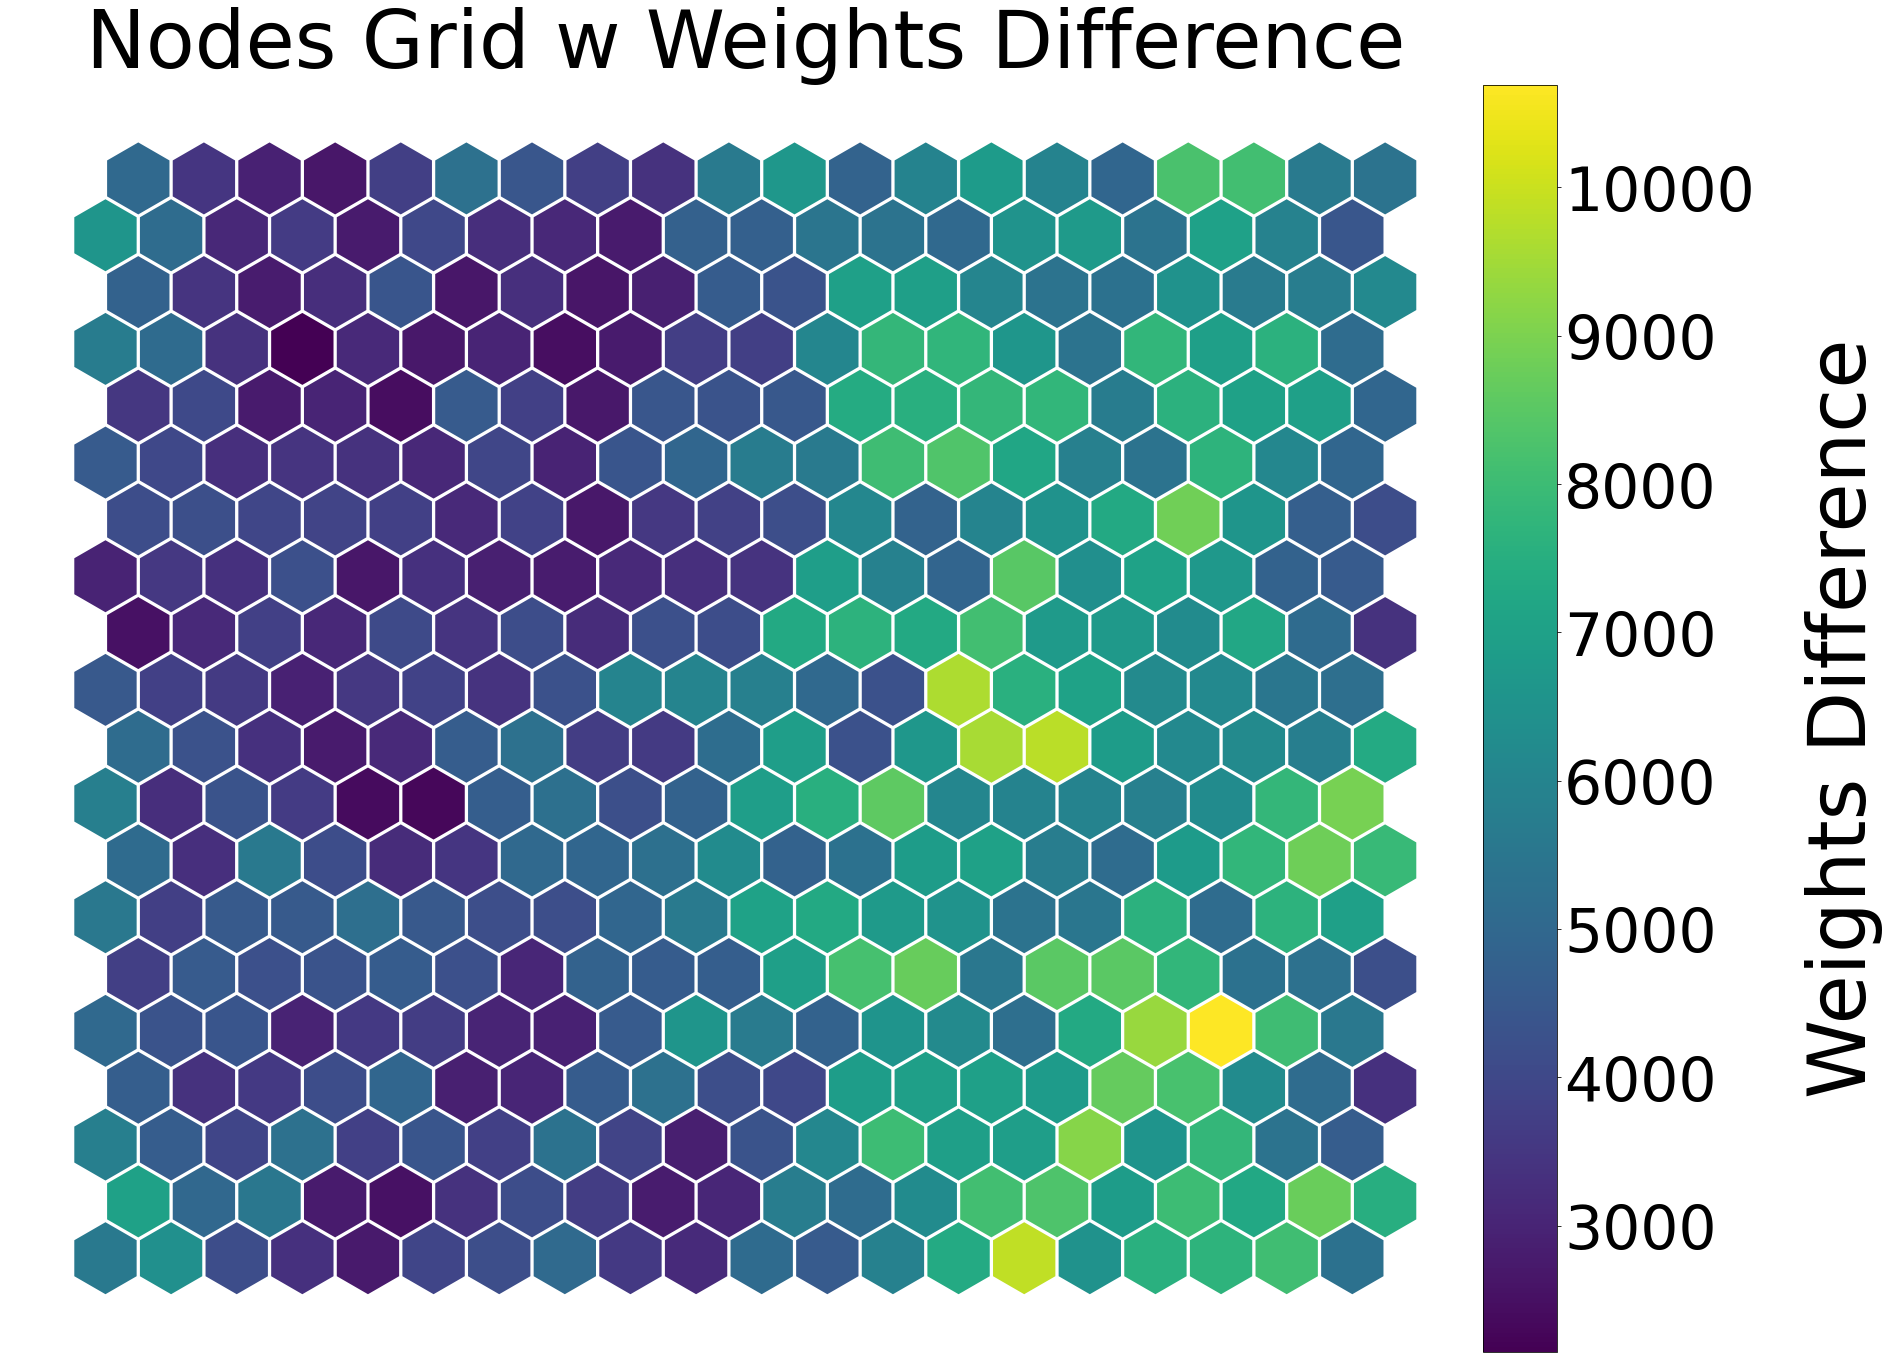

In [15]:
net.nodes_graph(colnum = 0)
net.diff_graph()

Clustering the datapoints using threshold algorithm

In [ ]:
net.cluster(features, type='qthresh')

Saving the results

In [ ]:
net.save('cb4_weights_500it_001lr')